#Câu 1: Mô phỏng quy hoạch tần số

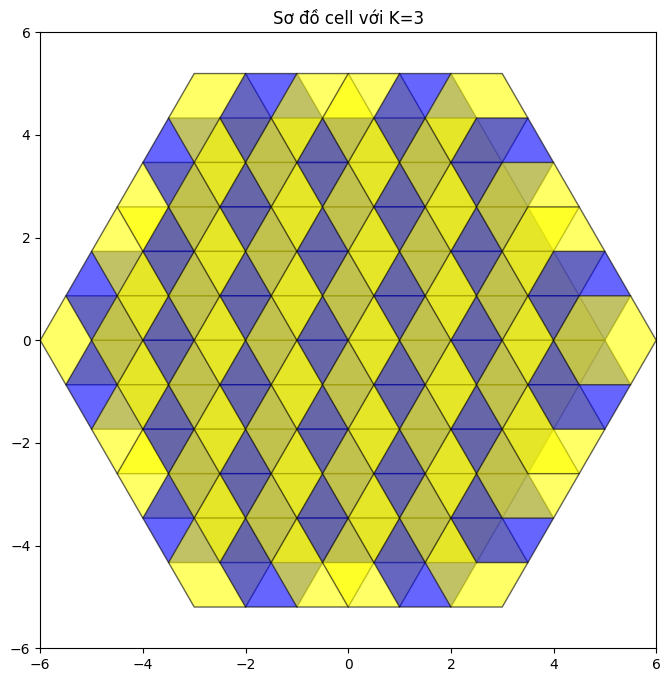

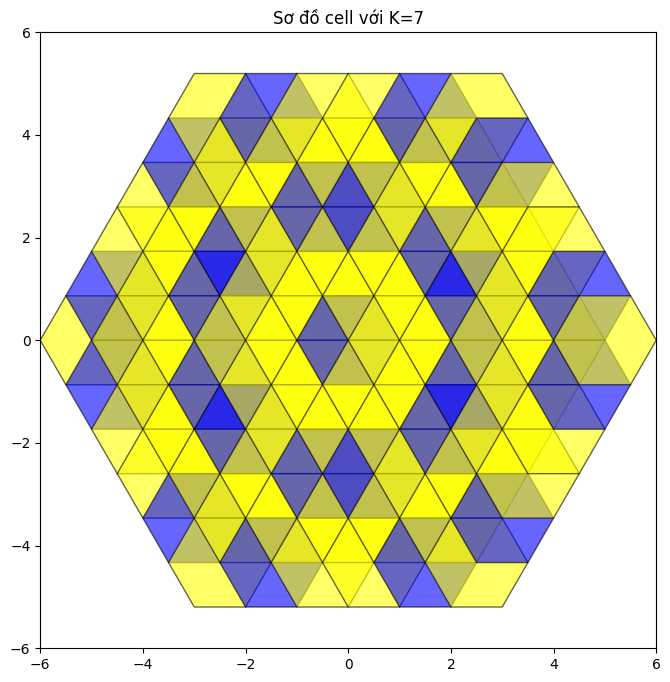

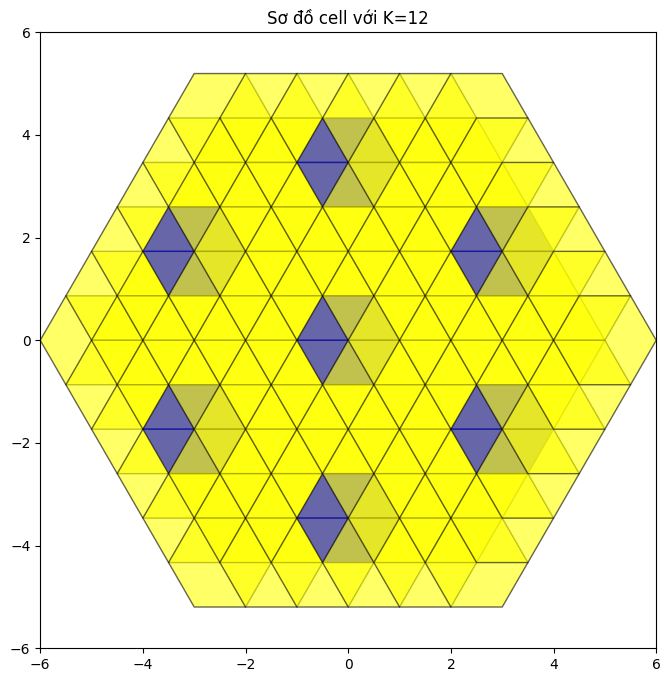

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_hex_grid(radius=5):
    """Tạo lưới hình lục giác với bán kính nhất định."""
    points = []
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            k = -i - j
            if abs(k) <= radius:
                x = i + j / 2
                y = np.sqrt(3) / 2 * j
                points.append((x, y, i, j))
    return points

def plot_cells(K, radius=5):
    """Vẽ sơ đồ cell với giá trị K nhất định."""
    points = generate_hex_grid(radius)
    fig, ax = plt.subplots(figsize=(8, 8))

    co_channel_cells = []
    for x, y, i, j in points:
        k_value = i**2 + i*j + j**2
        color = 'yellow' if k_value % K != 0 else 'blue'
        if color == 'blue':
            co_channel_cells.append((x, y))

        hexagon = plt.Polygon(
            [(x + np.cos(theta), y + np.sin(theta)) for theta in np.linspace(0, 2*np.pi, 7)],
            edgecolor='black', facecolor=color, alpha=0.6
        )
        ax.add_patch(hexagon)

    ax.set_xlim(-radius - 1, radius + 1)
    ax.set_ylim(-radius - 1, radius + 1)
    ax.set_aspect('equal')
    plt.title(f'Sơ đồ cell với K={K}')
    plt.show()

# Hiển thị sơ đồ với các giá trị K khác nhau
for K in [3, 7, 12]:
    plot_cells(K)

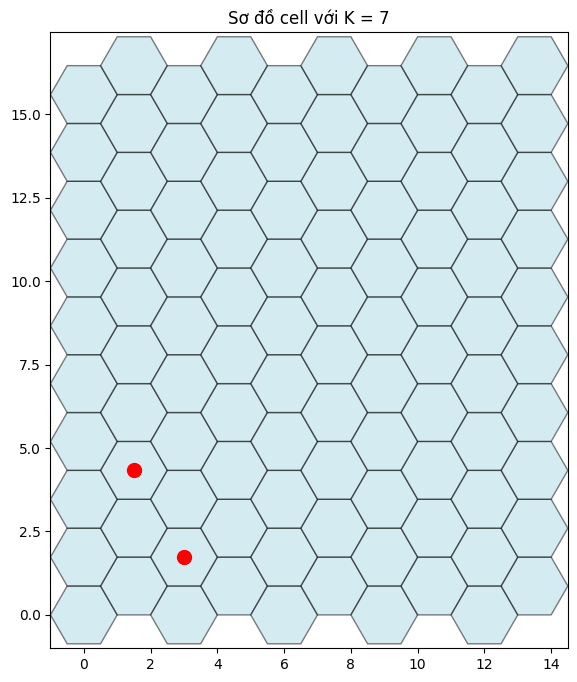

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hex_grid(rows, cols, cell_radius):
    """Tạo lưới hình lục giác với số hàng và số cột cho trước"""
    hex_grid = []
    for i in range(rows):
        for j in range(cols):
            x = cell_radius * (3/2 * j)
            y = cell_radius * (np.sqrt(3) * (i + 0.5 * (j % 2)))
            hex_grid.append((x, y, i, j))
    return hex_grid

def get_cochannel_cells(K, grid):
    """Tìm các cell đồng kênh dựa vào công thức K = i^2 + ij + j^2"""
    cochannel_cells = []
    for x, y, i, j in grid:
        if i**2 + i*j + j**2 == K:
            cochannel_cells.append((x, y))
    return cochannel_cells

def plot_hex_grid(grid, cochannel_cells, cell_radius):
    """Vẽ lưới hình lục giác và đánh dấu các cell đồng kênh"""
    fig, ax = plt.subplots(figsize=(8, 8))
    for x, y, _, _ in grid:
        hexagon = plt.Polygon([
            (x + cell_radius * np.cos(theta), y + cell_radius * np.sin(theta))
            for theta in np.linspace(0, 2 * np.pi, 7)
        ], edgecolor='black', facecolor='lightblue', alpha=0.5)
        ax.add_patch(hexagon)

    for x, y in cochannel_cells:
        ax.plot(x, y, 'ro', markersize=10, label="Cell đồng kênh" if 'label' not in locals() else "")

    ax.set_xlim(-cell_radius, max(x for x, _, _, _ in grid) + cell_radius)
    ax.set_ylim(-cell_radius, max(y for _, y, _, _ in grid) + cell_radius)
    ax.set_aspect('equal')
    plt.title(f"Sơ đồ cell với K = {K}")
    plt.show()

# Thông số lưới
rows, cols = 10, 10  # Số hàng và số cột của lưới cell
cell_radius = 1  # Bán kính mỗi cell
K = 7  # Giá trị K cần kiểm tra

# Tạo lưới và tìm cell đồng kênh
hex_grid = generate_hex_grid(rows, cols, cell_radius)
cochannel_cells = get_cochannel_cells(K, hex_grid)

# Vẽ sơ đồ
plot_hex_grid(hex_grid, cochannel_cells, cell_radius)


- Mạng lưới ô lục giác mô phỏng hệ thống tế bào với hệ số tái sử dụng K=7.
- Hai điểm đỏ đại diện cho các trạm phát sóng hoặc điểm nhiễu.
- Với K=7, khoảng cách giữa các cell sử dụng cùng một tần số không quá xa, có thể gây nhiễu đồng kênh cao hơn so với K lớn hơn.


#Câu 2: Tính toán nhiễu đồng kênh bằng Python

In [12]:
import numpy as np

def calculate_co_channel_interference(K, gamma=4):
    # Khoảng cách tái sử dụng D được tính theo công thức D = sqrt(3 * K)
    D = np.sqrt(3 * K)

    # Số lượng cell đồng kênh trong mô hình lục giác (thường lấy 6 cell gần nhất)
    N = 6

    # Tính mức nhiễu đồng kênh (C/I) theo công thức
    co_channel_interference = 1 / sum([(1 / (D ** gamma)) for _ in range(N)])

    return co_channel_interference

# Tính toán cho K = 7 và K = 12
for K in [7, 12]:
    ci_ratio = calculate_co_channel_interference(K)
    print(f"K = {K}, Tỷ lệ C/I: {ci_ratio:.2f}")


K = 7, Tỷ lệ C/I: 73.50
K = 12, Tỷ lệ C/I: 216.00


Mức nhiễu đồng kênh cho K=7: 0.013605
Mức nhiễu đồng kênh cho K=12: 0.004630


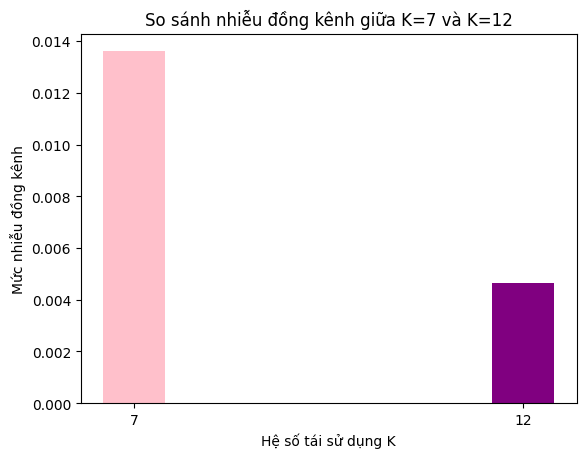

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa tham số
R = 1  # Bán kính của một cell (chuẩn hóa)
gamma = 4  # Hệ số suy hao (path loss exponent)
K_values = [7, 12]

def calculate_reuse_distance(K, R):
    """Tính khoảng cách tái sử dụng D"""
    return np.sqrt(3 * K) * R

def calculate_cochannel_interference(K, R, gamma):
    """Tính mức nhiễu đồng kênh"""
    D = calculate_reuse_distance(K, R)
    # Khoảng cách đến 6 cell đồng kênh xung quanh
    cochannel_distances = [D] * 6
    # Công thức tính nhiễu đồng kênh
    I_c = sum(1 / (d ** gamma) for d in cochannel_distances)
    return I_c

# Tính nhiễu cho các giá trị K
interference_values = {K: calculate_cochannel_interference(K, R, gamma) for K in K_values}

# In kết quả
for K, I_c in interference_values.items():
    print(f"Mức nhiễu đồng kênh cho K={K}: {I_c:.6f}")

# Vẽ biểu đồ so sánh
plt.bar(interference_values.keys(), interference_values.values(), color=['pink', 'purple'])
plt.xlabel("Hệ số tái sử dụng K")
plt.ylabel("Mức nhiễu đồng kênh")
plt.title("So sánh nhiễu đồng kênh giữa K=7 và K=12")
plt.xticks(K_values)
plt.show()


- Khi K=7, mức nhiễu đồng kênh cao hơn đáng kể so với khi K=12.

=> Điều này cho thấy rằng tăng hệ số tái sử dụng kênh (K) giúp giảm nhiễu đồng kênh, có thể do khoảng cách giữa các cell sử dụng cùng tần số tăng lên.
